In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing CSV file into Pandas DataFrame
vacc_df = pd.read_csv("Worldwide_Vaccine_Data.csv")

In [5]:
# Defining a function to describe a dataframe
def overview(df):
    vacc_df.info()
    vacc_df.shape[0]
    vacc_df.shape[1]
    vacc_df.describe()
    print(df.head())

overview(vacc_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            182 non-null    object 
 1   Doses administered per 100 people  177 non-null    float64
 2   Total doses administered           177 non-null    float64
 3   % of population vaccinated         175 non-null    float64
 4   % of population fully vaccinated   160 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.2+ KB
   Country  Doses administered per 100 people  Total doses administered  \
0   U.A.E.                              156.0                15198661.0   
1    Malta                              131.0                  659488.0   
2  Bahrain                              129.0                 2116497.0   
3    Aruba                              119.0                  126387.0   
4   Israel           

In [6]:
# Sorting and Subsetting
vacc_df.sort_values(["% of population fully vaccinated"], ascending=False, inplace=True)
print(vacc_df.head())
print(vacc_df[["Country", "% of population fully vaccinated"]])
print(vacc_df[vacc_df["% of population fully vaccinated"] > 50])
print(vacc_df[vacc_df["Country"] == "Ireland"]) #Irelands standing in global vaccination as of 30/6/21
print(vacc_df[vacc_df["Country"] == "United States"]) #US standing in global vaccination as of 30/6/21

   Country  Doses administered per 100 people  Total doses administered  \
1    Malta                              131.0                  659488.0   
2  Bahrain                              129.0                 2116497.0   
4   Israel                              119.0                10749083.0   
3    Aruba                              119.0                  126387.0   
5    Chile                              119.0                22501356.0   

   % of population vaccinated  % of population fully vaccinated  
1                        71.0                              63.0  
2                        64.0                              60.0  
4                        62.0                              57.0  
3                        64.0                              55.0  
5                        66.0                              55.0  
              Country  % of population fully vaccinated
1               Malta                              63.0
2             Bahrain                    

In [7]:
# Summary Statisitcs
vacc_df["% of population fully vaccinated"].agg([np.mean, min, max])

mean    14.52
min      0.00
max     63.00
Name: % of population fully vaccinated, dtype: float64

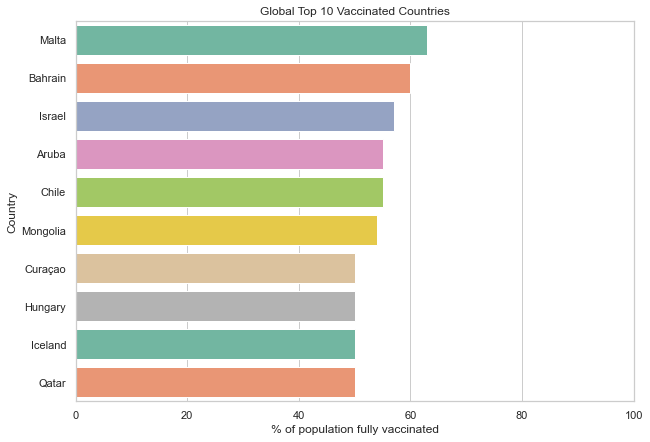

In [8]:
# Top ten % fully vaccinated

top_10 = vacc_df.iloc[:10, 0:5]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(y="Country", x="% of population fully vaccinated", data=top_10, orient="h", palette="Set2")
ax.set_title("Global Top 10 Vaccinated Countries")
ax.set(xlabel= "% of population fully vaccinated", ylabel= "Country")
ax.set_xlim(0, 100)
plt.show()
fig.savefig("top10.jpg")

In [16]:
# Creating a dictionary - western european stats

df = {"Country" : ["Malta", "Iceland", "Germany", "Spain", "Greece", "Netherlands", "Austria", "Switzerland", "Belgium", "Portugal", "Luxembourg", "Denmark", "Italy", "France", "Norway", "Sweeden", "Ireland", "Finland"], "% of population fully vaccinated" : [63, 50, 37, 36, 35, 35, 34, 34, 34, 33, 32, 32, 31, 30, 29, 29, 20, 18]}
westeuro_vacc = pd.DataFrame(df)
print(westeuro_vacc)

        Country  % of population fully vaccinated
0         Malta                                63
1       Iceland                                50
2       Germany                                37
3         Spain                                36
4        Greece                                35
5   Netherlands                                35
6       Austria                                34
7   Switzerland                                34
8       Belgium                                34
9      Portugal                                33
10   Luxembourg                                32
11      Denmark                                32
12        Italy                                31
13       France                                30
14       Norway                                29
15      Sweeden                                29
16      Ireland                                20
17      Finland                                18


In [9]:
# Introducing Second Dataframe
countries_df = pd.read_csv("countries of the world.csv")
print(countries_df.head())

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06      

In [10]:
# Merging Dataframes
vacc_df['Country'] = vacc_df['Country'].str.strip()
countries_df['Country'] = countries_df['Country'].str.strip()
globalvacc_df = vacc_df.merge(countries_df, on='Country', how='inner')
print(globalvacc_df.head())
print(globalvacc_df.columns)
overview(globalvacc_df)

   Country  Doses administered per 100 people  Total doses administered  \
0    Malta                              131.0                  659488.0   
1  Bahrain                              129.0                 2116497.0   
2   Israel                              119.0                10749083.0   
3    Aruba                              119.0                  126387.0   
4    Chile                              119.0                22501356.0   

   % of population vaccinated  % of population fully vaccinated  \
0                        71.0                              63.0   
1                        64.0                              60.0   
2                        62.0                              57.0   
3                        64.0                              55.0   
4                        66.0                              55.0   

                                Region  Population  Area (sq. mi.)  \
0  WESTERN EUROPE                           400214             316   
1  NEA

In [26]:
# Cleaning Data
print(globalvacc_df.isnull().sum())
globalvacc_df.drop_duplicates(subset="Country", inplace=True)
print(globalvacc_df.head())

Country                                0
Doses administered per 100 people      4
Total doses administered               4
% of population vaccinated             5
% of population fully vaccinated      17
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          0
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                           2
Phones (per 1000)                      1
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               15
Birthrate                              1
Deathrate                              1
Agriculture                            0
Industry                               0
Service                                0
dtype: int64
   

In [11]:
# Aggregating Data
print(globalvacc_df["Country"].count())
globalvacc_df["Region"].value_counts(sort=True)

160


SUB-SAHARAN AFRICA                     37
LATIN AMER. & CARIB                    27
ASIA (EX. NEAR EAST)                   23
WESTERN EUROPE                         18
NEAR EAST                              13
C.W. OF IND. STATES                    12
EASTERN EUROPE                         10
OCEANIA                                10
NORTHERN AFRICA                         5
BALTICS                                 3
NORTHERN AMERICA                        2
Name: Region, dtype: int64

In [12]:
globalvacc_df.groupby("Region")["% of population fully vaccinated"].agg([np.mean, min, max, np.median]) #Vaccine stats based on region

,mean,min,max,median
Region,,,,
ASIA (EX. NEAR EAST),10.859091,0.2,54.0,4.25
BALTICS,31.333333,28.0,37.0,29.00
C.W. OF IND. STATES,5.245455,0.2,12.0,3.00
EASTERN EUROPE,28.400000,11.0,50.0,29.50
LATIN AMER. & CARIB,14.480000,0.6,55.0,11.00
NEAR EAST,23.520000,0.0,60.0,15.00
NORTHERN AFRICA,10.133333,0.8,25.0,4.60
NORTHERN AMERICA,38.000000,30.0,46.0,38.00
OCEANIA,8.037500,0.6,22.0,5.40


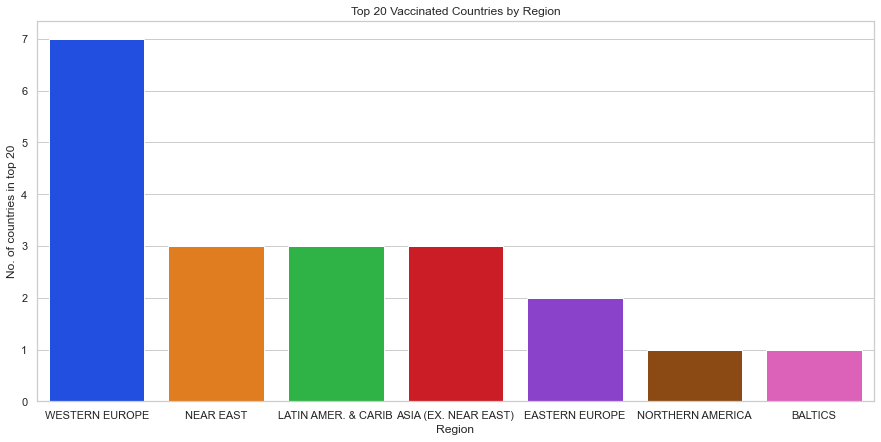

In [18]:
# No. of countries by region with the top 20 global vaccine rates

top_20 = globalvacc_df.iloc[:20, 0:7]
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x="Region", data=top_20, palette="bright").set_title("Top 20 Vaccinated Countries by Region")
ax.set(xlabel="Region", ylabel="No. of countries in top 20")
plt.show()
fig.savefig("Top20.jpg")
# Some insights can be taken but must take into account the number of countries actually present in the region, such as north america only contains US

In [14]:
# Slicing and Subsetting
globalvacc_df.iloc[:10, 0:7] #The Global Top 10

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Region,Population
0,Malta,131.0,659488.0,71.0,63.0,WESTERN EUROPE,400214
1,Bahrain,129.0,2116497.0,64.0,60.0,NEAR EAST,698585
2,Israel,119.0,10749083.0,62.0,57.0,NEAR EAST,6352117
3,Aruba,119.0,126387.0,64.0,55.0,LATIN AMER. & CARIB,71891
4,Chile,119.0,22501356.0,66.0,55.0,LATIN AMER. & CARIB,16134219
5,Mongolia,115.0,3720002.0,61.0,54.0,ASIA (EX. NEAR EAST),2832224
6,Hungary,101.0,9839749.0,56.0,50.0,EASTERN EUROPE,9981334
7,Iceland,108.0,390877.0,72.0,50.0,WESTERN EUROPE,299388
8,Qatar,110.0,3109044.0,60.0,50.0,NEAR EAST,885359
9,Uruguay,112.0,3882882.0,65.0,47.0,LATIN AMER. & CARIB,3431932


In [15]:
globalvacc_df['Region'] = globalvacc_df['Region'].str.strip()
globalvacc_df.loc[globalvacc_df['Region'] == "WESTERN EUROPE"] # Focusing on Western Europe

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Malta,131.0,659488.0,71.0,63.0,WESTERN EUROPE,400214,316,1266.5,62.28,...,505.0,28.13,3.13,68.74,NaN,10.22,8.10,0.030,0.230,0.740
7,Iceland,108.0,390877.0,72.0,50.0,WESTERN EUROPE,299388,103000,2.9,4.83,...,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
13,Germany,89.0,73754612.0,55.0,37.0,WESTERN EUROPE,82422299,357021,230.9,0.67,...,667.9,33.85,0.59,65.56,3.0,8.25,10.62,0.009,0.296,0.695
14,Spain,86.0,40565038.0,53.0,36.0,WESTERN EUROPE,40397842,504782,80.0,0.98,...,453.5,26.07,9.87,64.06,3.0,10.06,9.72,0.040,0.295,0.665
16,Greece,77.0,8299173.0,45.0,35.0,WESTERN EUROPE,10688058,131940,81.0,10.37,...,589.7,21.10,8.78,70.12,3.0,9.68,10.24,0.054,0.213,0.733
18,Netherlands,90.0,15512950.0,58.0,35.0,WESTERN EUROPE,16491461,41526,397.1,1.09,...,460.8,26.71,0.97,72.32,3.0,10.90,8.68,0.021,0.244,0.736
19,Austria,86.0,7631324.0,53.0,34.0,WESTERN EUROPE,8192880,83870,97.7,0.00,...,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678
20,Switzerland,84.0,7236625.0,50.0,34.0,WESTERN EUROPE,7523934,41290,182.2,0.00,...,680.9,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645
21,Belgium,93.0,10666126.0,61.0,34.0,WESTERN EUROPE,10379067,30528,340.0,0.22,...,462.6,23.28,0.40,76.32,3.0,10.38,10.27,0.010,0.240,0.749
23,Portugal,83.0,8480339.0,54.0,33.0,WESTERN EUROPE,10605870,92391,114.8,1.94,...,399.2,21.75,7.81,70.44,3.0,10.72,10.50,0.053,0.274,0.673


In [17]:
# For loop 

globalvacc_df["% of population vaccinated"].astype(str).astype(float)
count = 0
for value in globalvacc_df["% of population vaccinated"]:
    if value >= 50:
        count +=1
print("There are", count, "countries with high vaccination coverage")

There are 28 countries with high vaccination coverage


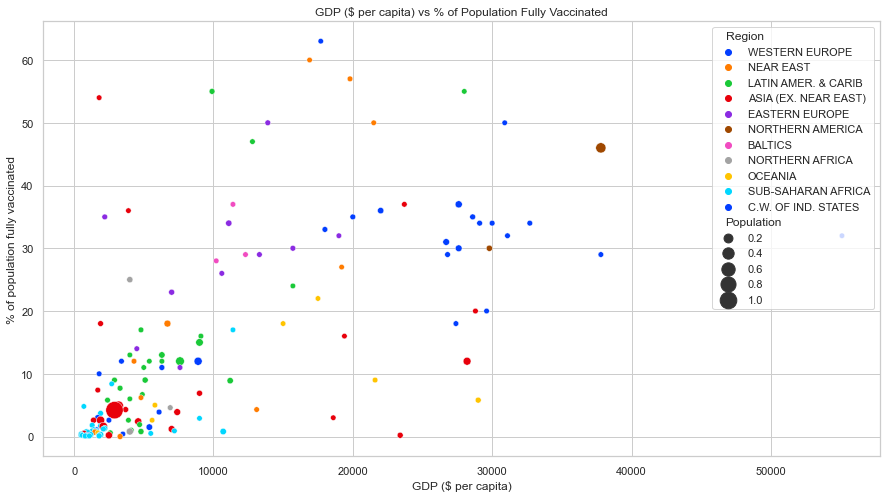

In [20]:
# Visualisation comparing % population vaccinated versus GDP
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=globalvacc_df, x="GDP ($ per capita)", y="% of population fully vaccinated", hue="Region", size="Population", sizes=(30, 300), palette="bright")
plt.title("GDP ($ per capita) vs % of Population Fully Vaccinated")
plt.show()
fig.savefig("GDP vs fully vacc.jpg")

In [21]:
# Using a pivot table to compare % pop vaccinated vs fully vaccinated

vacc_pivot = pd.pivot_table(globalvacc_df, values=["% of population vaccinated", "% of population fully vaccinated"], index="Country").sort_values(["% of population fully vaccinated"], ascending=False)
top15_pivot = vacc_pivot.iloc[:15, :]
print(top15_pivot)

               % of population fully vaccinated  % of population vaccinated
Country                                                                    
Malta                                      63.0                        71.0
Bahrain                                    60.0                        64.0
Israel                                     57.0                        62.0
Aruba                                      55.0                        64.0
Chile                                      55.0                        66.0
Mongolia                                   54.0                        61.0
Hungary                                    50.0                        56.0
Iceland                                    50.0                        72.0
Qatar                                      50.0                        60.0
Uruguay                                    47.0                        65.0
United States                              46.0                        54.0
Germany     

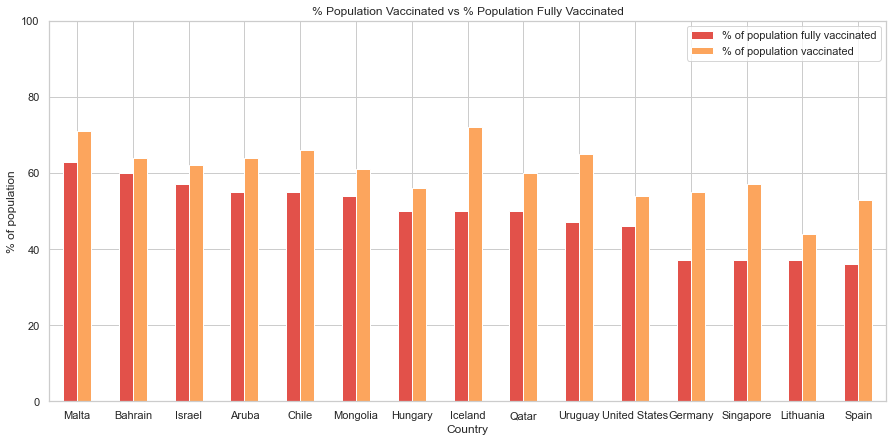

In [25]:
# Visualisation comapring % population given one dose vs 2 doses
sns.set_palette("Spectral")
ax = top15_pivot.plot.bar(rot=0, figsize=(15, 7))
ax.set_ylim(0, 100)
ax.set_title("% Population Vaccinated vs % Population Fully Vaccinated")
ax.set(xlabel= "Country", ylabel= "% of population")
fig.savefig("population.jpg")